#### Topic:      Prework Solutions
#### Cohort:   03_Spring2015
#### Date:        01-Apr-2015
#### Author:     Reshama Shaikh

Prework: Required Exercises

https://github.com/datascopeanalytics/metis-data-science-bootcamp-prework/blob/master/exercises.md

Source:     Think Stats (section Using the Code), there is some accompanying code and data. You can get these from the Think Stats repository.
https://github.com/AllenDowney/ThinkStats2

------------------------------------------------------------------------------- 

####Note:

Step1.  Create a directory on your computer.  Below is an example:

/Users/reshamashaikh/ds/metis/metisgh/

Step2.  use GitHub to pull this repo to your computer

git clone https://github.com/AllenDowney/ThinkStats2.git

Step3.  Put your ipython notebook in this directory (that way, it can pull the needed dependencies):  

/Users/reshamashaikh/ds/metis/metisgh/ThinkStats2/code/

(content will match:  https://github.com/AllenDowney/ThinkStats2/tree/master/code )

Step4.  Call your prework solutions notebook:  

0_S_Prework_myname.ipynb

##Table of Contents 
[Exercise01](#1) 

(Think Stats Ex 2.4) 

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?
 

[Exercise02](#2)

(Think Stats Ex 3.1) 

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.
Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb. This is an ipython notebook from the ThinkStats2 repository.


[Exercise03](#3)

(Think Stats Ex 4.2) 

The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?



[Exercise04](#4)

(Think Stats Ex 7.1) 

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

[Exercise05](#5)

(Think Stats Ex 8.2)

Suppose that you draw a sample with size n = 10 from an exponential distribution with λ = 2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n and make a plot of standard error versus n.


[Exercise06](#6)

(Think Stats Ex 2.1 Bayes)

The cookie problem is a problem discussed in sections 1.3, 2.2 and 2.3 of Think Bayes. Solve the following problem. In Section 2.3 I said that the solution to the cookie problem generalizes to the case where we draw multiple cookies with replacement. But in the more likely scenario where we eat the cookies we draw, the likelihood of each draw depends on the previous draws.

Modify the solution in this chapter to handle selection without replacement. Hint: add instance variables to Cookie to represent the hypothetical state of the bowls, and modify Likelihood accordingly. You might want to define a Bowl object.


-----------------------------------------------------------------------------------------

### <a id='1'></a> Exercise 1 
(Think Stats Ex 2.4)

a) Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. 

b) Compute Cohen’s d to quantify the difference between the groups. 

c) How does it compare to the difference in pregnancy length?

Note:  Cohen's d is an effect size used to indicate the standardised difference between two means. It can be used, for example, to accompany reporting of t-test and ANOVA results. 

In [2]:
# set working directory
path_data = "/Users/luc/Documents/DataScience/metis/prework/ThinkStats2"

In [41]:
import nsfg
df = nsfg.ReadFemPreg()
print "Length of df: ", len(df)
df.head()

Length of df:  13593


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5,NaN,3,5,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [4]:
firsts = df[df.birthord==1]
others = df[df.birthord>1]
print "len of firsts: ", len(firsts)
print "len of others: ", len(others)

len of firsts:  4413
len of others:  4735


In [11]:
print "firsts total birth wt (mean): ", firsts.totalwgt_lb.mean()
print "others total birth wt (mean): ", others.totalwgt_lb.mean()
print "firsts total birth wt (standard deviation): ", firsts.totalwgt_lb.std()
print "others total birth wt (standard deviation): ", others.totalwgt_lb.std()

firsts total birth wt (mean):  7.20109443044
others total birth wt (mean):  7.32585561497
firsts total birth wt (standard deviation):  1.42057287772
others total birth wt (standard deviation):  1.39419547621


####Question: 1a) Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others.
####Answer:   
####First babies are lighter than others (7.20 vs 7.33 lbs)

In [13]:
#b) Compute Cohen’s D to quantify the difference between the groups. 

# Cohen's D function
import math
def CohenD(grp1, grp2):
    print "Computing Cohen D statistic"
    mean1 = grp1.mean()
    mean2 = grp2.mean()
    var1  = grp1.var()
    var2  = grp2.var()
    len1  = len(grp1)
    len2  = len(grp2)
    pooled_var = (len1*var1+len2*var2)/(len1+len2)
    cd = (mean1-mean2)/math.sqrt(pooled_var)
    return cd
print CohenD(firsts.totalwgt_lb, others.totalwgt_lb)
    
    
    
    
    
    
    

Computing Cohen D statistic
-0.0886729270726


####Answer:  

####Cohen's D is:  -0.0887

c) How does Cohen's D compare to the difference in pregnancy length? 

In [16]:
print "Cohen's D for birth weight is: %f" % CohenD(firsts.totalwgt_lb,others.totalwgt_lb)
print "Cohen's D for pregnancy length is: %f" % CohenD(firsts.prglngth,others.prglngth)

Computing Cohen D statistic
Cohen's D for birth weight is: -0.088673
Computing Cohen D statistic
Cohen's D for pregnancy length is: 0.028879


####Interpretation
This site has a good interpretation of Cohen's D, effect size:
http://www.uccs.edu/lbecker/effect-size.html

Both statistics are too small to warrant claiming an effect.  In fact, one might expect a larger birth weight to be associated with a longer pregnancy, but the data at hand indicate the opposite trend.

-------------------------------------------------------------------------------------------

### <a id='2'></a> Exercise 2 
(Think Stats Ex 3.1)

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb. This is an ipython notebook from the ThinkStats2 repository.

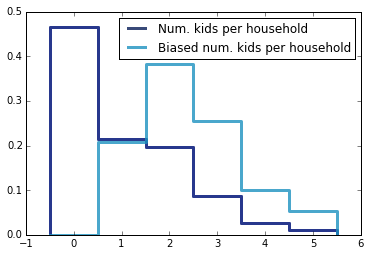

Unbiased mean number of children under 18 per family 1.024205
Biased mean number of children under 18 per family 2.403679


In [33]:
%matplotlib inline
import chap01soln
import thinkstats2
import thinkplot
resp = chap01soln.ReadFemResp()
numkdhh_pmf = thinkstats2.Pmf(resp.numkdhh)
thinkplot.Pmf(numkdhh_pmf, label='Num. kids per household')
def biased_pmf(pmf,label=''):
    """
    For class size paradox, compute biased PMF from unbiased PMF.  If there 
    are x individuals in a given class, and we construct class size probabilities
    by surveying individuals, we will overestimate these probabilities by a factor
    of x.
    
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf
biased_numkdhh_pmf = biased_pmf(numkdhh_pmf,'Biased num. kids per household')
#
# Plotting stuff comes here.
thinkplot.PrePlot(2)
thinkplot.Pmfs([numkdhh_pmf, biased_numkdhh_pmf])
thinkplot.Show()
print 'Unbiased mean number of children under 18 per family %f' % numkdhh_pmf.Mean()
print 'Biased mean number of children under 18 per family %f' % biased_numkdhh_pmf.Mean()

-------------------------------------------------------------------------------------------

### <a id='3'></a> Exercise 3 
(Think Stats Ex 4.2)

The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

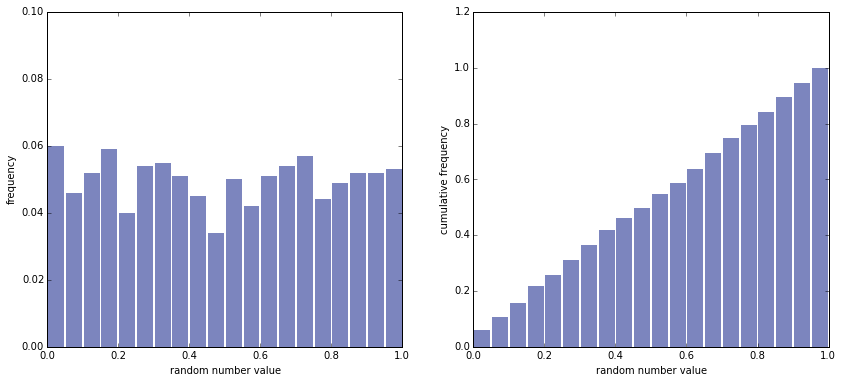

In [56]:
%matplotlib inline
import random
import thinkstats2
import thinkplot
num_num = 1000
uniform_random = [random.random() for i in range(num_num)]
num_bins = 20
bin_centers = [(float(i)+0.5)/num_bins for i in range(num_bins)]
pdf_hist = [0]*num_bins
for x in uniform_random:
    bin_num = int(num_bins*x)
    pdf_hist[bin_num] += 1.0
for bin_num in range(num_bins):
    pdf_hist[bin_num] /= num_num
cdf_hist = pdf_hist[:]
for bin_num in range(1,num_bins):
    cdf_hist[bin_num] = cdf_hist[bin_num-1] + pdf_hist[bin_num]
pdf_dict = dict(zip(bin_centers,pdf_hist))
cdf_dict = dict(zip(bin_centers,cdf_hist))
# 
# Plotting stuff comes here.
hist1 = thinkstats2.Hist(pdf_dict)
hist2 = thinkstats2.Hist(cdf_dict)
thinkplot.PrePlot(2,cols=2)
thinkplot.Hist(hist1)
thinkplot.Config(xlabel='random number value', ylabel='frequency', axis=[0.0,1.0,0.0,0.1])
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Hist(hist2)
thinkplot.Show(xlabel='random number value', ylabel='cumulative frequency', axis=[0.0,1.0,0.0,1.2])

####Answer:
Yes, distribution looks uniform

-------------------------------------------------------------------------------------------

### <a id='4'></a> Exercise 4 
(Think Stats Ex 7.1)

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [61]:
import nsfg
df = nsfg.ReadFemPreg()
print "Length of df: ", len(df)
dfsel = df[(df.totalwgt_lb<200) & (df.agepreg<200)]
print "Length of dfsel: ", len(dfsel)

Length of df:  13593
Length of dfsel:  9038


####Answer:
For the Pearson r correlation, both variables should be normally distributed.  Other assumptions include linearity and homoscedasticity.  Linearity assumes a straight line relationship between each of the variables in the analysis and homoscedasticity assumes that data is normally distributed about the regression line.

Spearman rank correlation test does not make any assumptions about the distribution. 

####Conclusions:
Data seem to be  ....

-----------------------------------------------------------------------------------------

### <a id='5'></a> Exercise 5
(Think Stats Ex 8.2)

Suppose that you draw a sample with size n = 10 from an exponential distribution with λ = 2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n and make a plot of standard error versus n.

In [89]:
import thinkstats2



-----------------------------------------------------------------------------------------

### <a id='6'></a> Exercise 6
(Think Stats Ex 2.1 Bayes)

The cookie problem is a problem discussed in sections 1.3, 2.2 and 2.3 of Think Bayes. Solve the following problem. In Section 2.3 I said that the solution to the cookie problem generalizes to the case where we draw multiple cookies with replacement. But in the more likely scenario where we eat the cookies we draw, the likelihood of each draw depends on the previous draws.

Modify the solution in this chapter to handle selection without replacement. Hint: add instance variables to Cookie to represent the hypothetical state of the bowls, and modify Likelihood accordingly. You might want to define a Bowl object.

In [90]:
# get this file from:  https://github.com/AllenDowney/ThinkBayes/blob/master/thinkbayes.py
from thinkbayes import Pmf